# Challenge Large Scale Machine Learning


# 0. Introduction


### Authors: 
Pavlo Mozharovskyi (pavlo.mozharovskyi@telecom-paris.fr), Stephan Clémençon, Jayant Sen Gupta


## Functional anomaly detection

**Anomaly detection** (or **outlier detection**) comprises the **machine learning** methods aimed at identification of observations that exhibit suspicious behaviour and are very likely to cause a problem. In the **unsupervised learning** framework, no label indicating whether a training observation is anomalous or not is available. Hence, anomalies should be identified in an automatic way by learning the *normal* behavior, that of the vast majority of the observations, and considering those differing significantly from it as *abnormal*. Logically, anomalies are rare in the data and thus fall in *low density* regions: anomaly detection thus boils down to identifying the *tail* of the distribution.

With the ubiquitous deployment of sensors monitoring nearly continuously the health of complex infrastructures, **anomaly detection** can now rely on measurements sampled at a very high frequency, providing a very rich representation of the phenomenon under surveillance. In order to exploit fully the collected information, the observations cannot be treated as multivariate data anymore and a functional analysis approach is required.

A (very) short list of **literature** regarding functional anomaly detection can include:
 - J.O. Ramsay, Silverman, B.W. (2005): Functional Data Analysis. Springer-Verlag, New-York.
 - Ferraty, F., Vieu, P. (2006): Nonparametric Functional Data Analysis: Theory and Practice. Springer Science & Business Media.
 - Chandola, V., Banerjee, A., Kumar, V. (2009): Anomaly detection: A survey. ACM Computing Surveys (CSUR) 41(3), 1-58.
 - Hubert, M., Rousseeuw, P.J., Segaert, P. (2015): Multivariate functional outlier detection. Statistical Methods & Applications 24(2), 177-202.
 - Wang, J.L., Chiou, J.M., Müller, H.G. (2016): Functional data analysis. Annual Review of Statistics and Its Application 3, 257-295.

## The properties of the dataset

The data set is provided by the Airbus and consistst of the measures of the accelerometer of helicopters during  1 minute at frequency 1024 Hertz, which yields time series measured at in total 60 * 1024 = 61440 equidistant time points.

### Training data: 

The training set consists of one file, **airbus_train.csv**.

File **airbus_train.csv** contains one observation per row, each observation having 61440 entries, measures with equivalent time distance of 1 / 1024 seconds.

There are in total 1677 training observations.

Training data, input (file **airbus_train.csv**): https://partage.imt.fr/index.php/s/zqrRggLBY8GRc9i

### Test data:

The training set consists of one file, **airbus_test.csv**, which has the same structure as file **airbus_train.csv**.

There are in total 2511 test observations.

Training data, output (file airbus_test.csv): https://partage.imt.fr/index.php/s/WpiqcjMq8ymg8zA

### Remark:

The task of the **unsupervised anomaly detection** is difficult, in the sense that, strictly speaking, your only feedback will be your score calculated by the submission website.

## The performance criterion

You should submit a file that contains in each row anomaly score for the observation in the corresponding row of the file **airbus_test.csv**. For a sample submission please see the codes below. Please note, that your score should provide ordering which allows to identify anomalies, i.e. the higher the value of the score, the **more abnormal** the observation should be considered.

The performance criterion is the **Area Under the Receiver Operating Characteristic** (AUC), see also:
https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

## Notes


* Les colonnes ont toutes la même signification ! Faire des études avec l'ordre des colonnes mélangés (data augmentation ?) et d'autres avec les colonnes normalement et un traitement qui prend en compte la composante temporelle.
* Classer les échantillons par type (timeserie homogène, timeserie avec faible start puis allumage, etc.) et différencier leur traitement
* Concaténer xtrain et xtest, voir entraîner le modèle que sur xtest.
* Etudier les statistiques descriptives du fichier de soumissions. Comment sont réparties les variablse vs le score obtenu.
* Stacking ?
* Essayer avec différents RANDOM_STATE
* Exporter les courbes temporelles des times series en images et utiliser un algo de détection d'anomalies dans des images.
* Générer des features explicatives (stats: mean, valeurs max, min, percentiles, etc., forme de courbe (à calculer) et entrainer un modèle que sur ces features
* Normaliser les time series
* Passer en float32
* VAE 2020.pdf

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

In [2]:
ROOT = "./" #"drive/My Drive/Colab Notebooks/Data Challenge 2/"
RANDOM_STATE = 261

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

# 1. Data loading

In [4]:
%%time

xtrain = np.loadtxt(ROOT + 'data/airbus_train.csv', delimiter= ' ')
print("Train:", xtrain.shape)
#xtest = np.loadtxt(ROOT + 'data/airbus_test.csv', delimiter= ' ')
#print("Test:", xtest.shape)

Train: (1677, 61440)
CPU times: user 55.7 s, sys: 3.24 s, total: 59 s
Wall time: 1min 1s


# 2. Data exploration

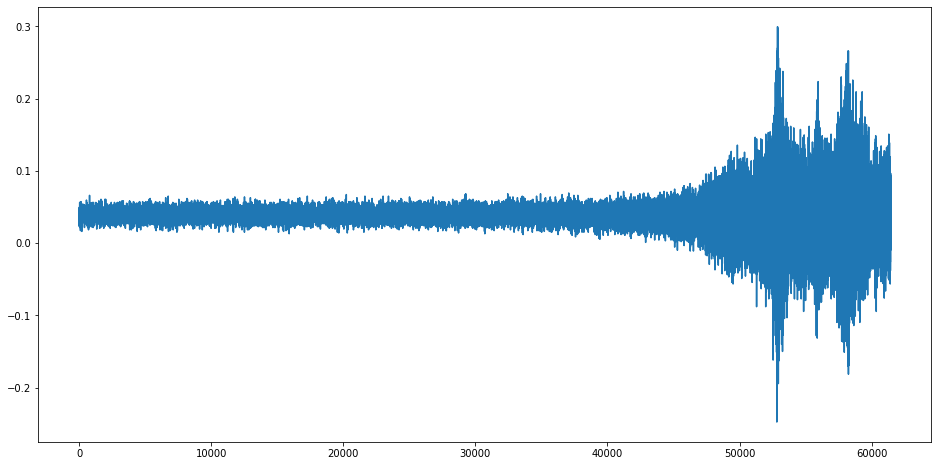

In [5]:
# Plot first 614 time points for first 100 observations
plt.figure(figsize=(16,8))
plt.plot(xtrain[0,:])
#plt.show()
plt.savefig(ROOT + "data-display/test")

In [4]:
xtrain.shape

(1677, 61440)

In [10]:
del ax

In [ ]:
import time
import gc

for i in range(678, xtrain.shape[0]):
    """f = plt.figure(figsize=(16,8))
    f.plot(xtrain[i,:])
    f.savefig(ROOT + "data-display/xtrain/" + str(i))
    f.clear()
    plt.close(f)"""
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(xtrain[i,:])
    fig.savefig(ROOT + "data-display/xtrain/" + str(i))
    ax.cla()
    fig.clf()
    plt.close(fig)
    gc.collect()
    print(i)
    time.sleep(2)



678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754


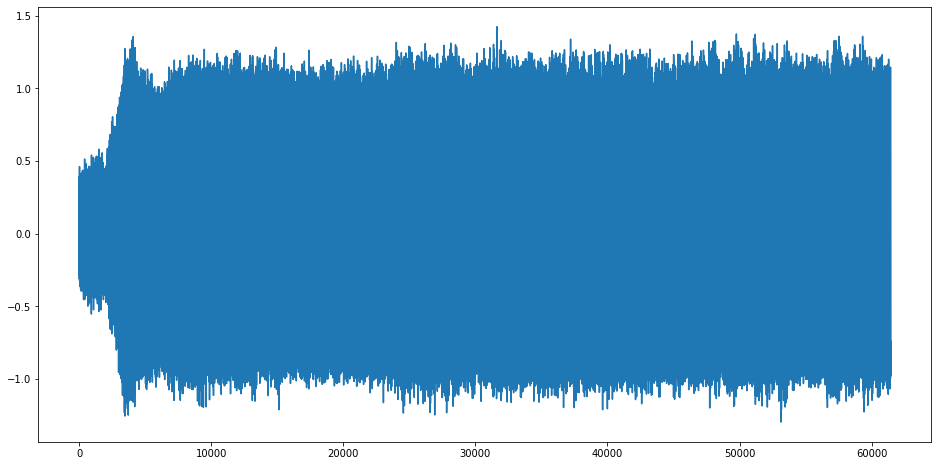

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtrain[1,:])
plt.show()

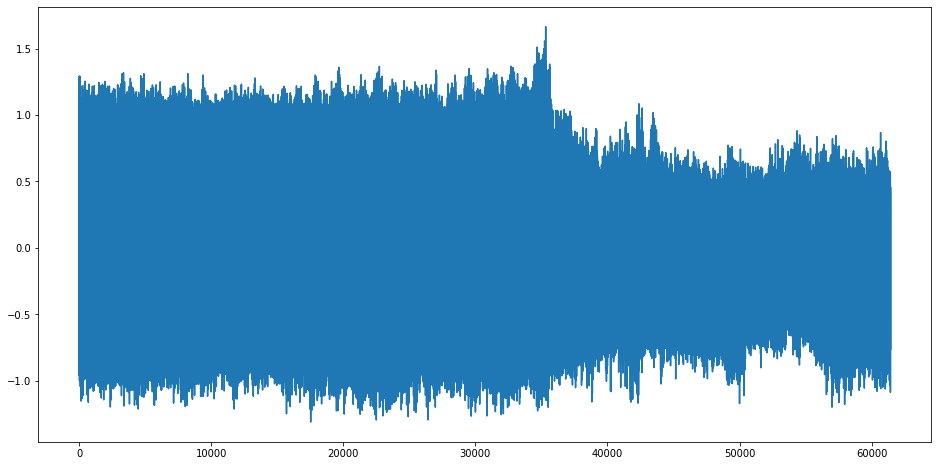

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtrain[10,:])
plt.show()

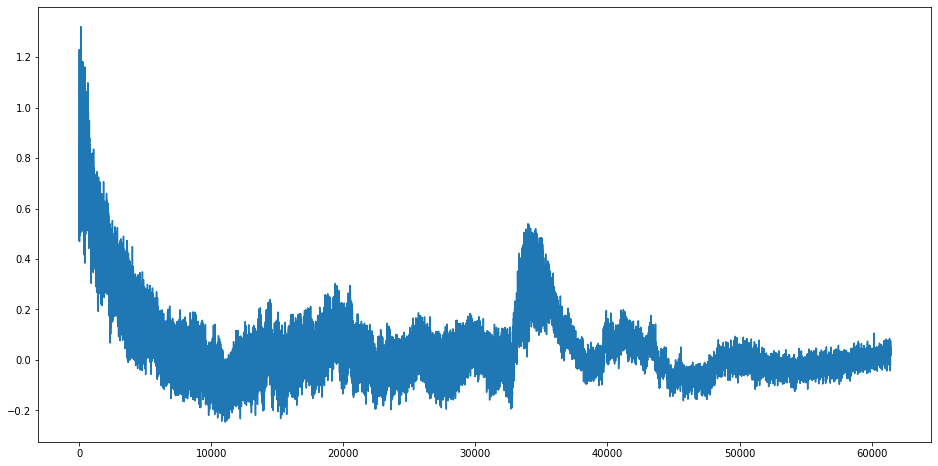

In [0]:
plt.figure(figsize=(16,8))
plt.plot(xtest[0,:])
plt.show()

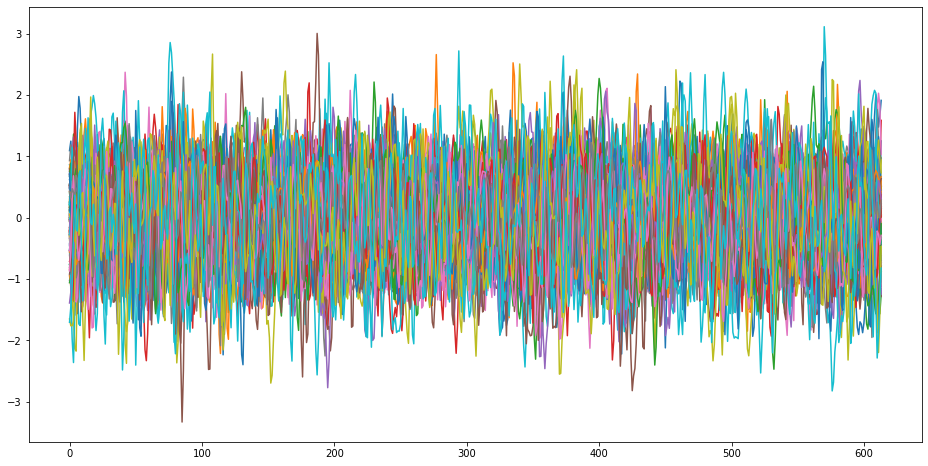

In [0]:
# Plot first 614 time points for first 100 observations
plt.figure(figsize=(16,8))
for i in range(100):
    plt.plot(range(614),xtrain[i,:614])
plt.show()

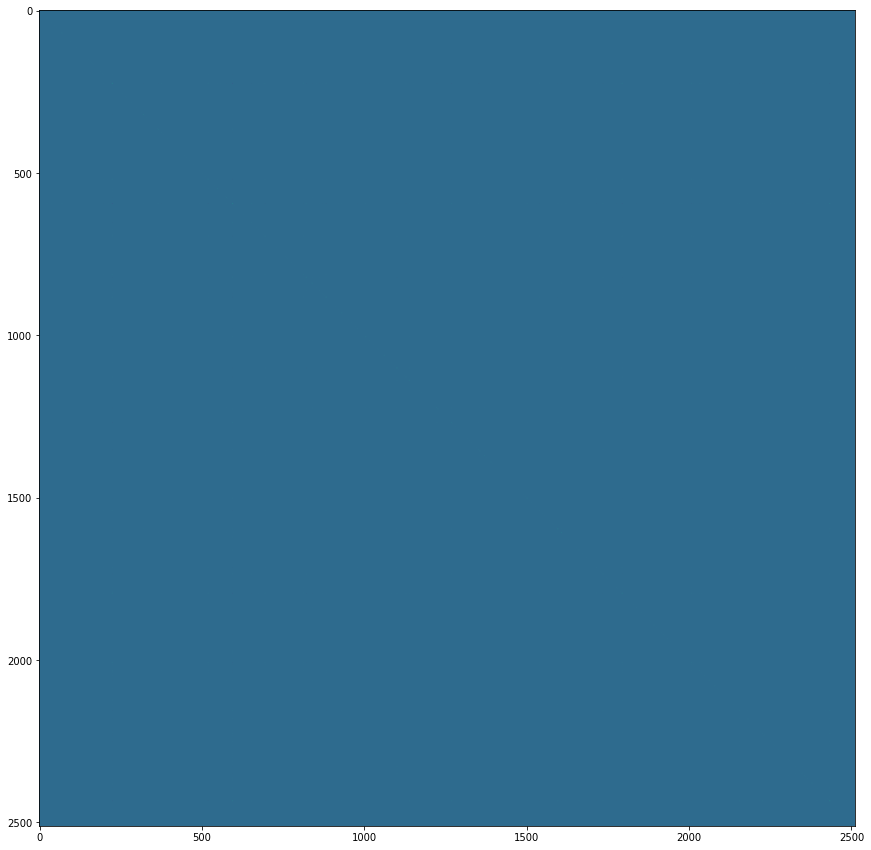

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(X_train_cov)
plt.show()

# 3. Data preparation

# 4. Models

Possible option: Using the projection on a low-dimensional space

In [0]:
xtrain.shape

(1677, 61440)

In [0]:
xtest.shape

(2511, 61440)

In [0]:
xconcat = np.concatenate((xtrain, xtest), axis = 0)
xconcat.shape

(4188, 61440)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [0]:
%%time

# PCA transform
pca1 = PCA(n_components = 10, whiten = True, random_state=RANDOM_STATE)
pca1.fit(xtrain) #[:100,:])
xtrain_fpca = pca1.fit_transform(xtrain[:100,:])

# Fit the low-dimensional method
lof1 = LocalOutlierFactor(n_neighbors = 20, contamination = 'auto', novelty = True)
lof1.fit(xtrain_fpca)

# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest)
sscore = -lof1.score_samples(xtest_fpca)
print(sscore[:100])

[1.20332914 0.9769213  0.9827649  0.98056575 0.9827649  0.9769213
 0.9769213  0.9769213  0.9827649  1.22429025 0.9769213  0.9827649
 0.9769213  0.9827649  0.9769213  0.97474969 0.9827649  0.9769213
 0.9769213  0.9769213  0.9827649  0.9769213  0.9769213  0.9827649
 8.2236471  0.9769213  0.9769213  0.9769213  0.9769213  0.9827649
 0.9769213  0.9827649  0.9827649  0.9769213  0.97705685 0.9827649
 0.9769213  4.62070915 0.9827649  0.99168268 0.9827649  0.9769213
 0.9769213  0.9769213  0.9769213  0.9769213  0.99388882 0.9827649
 0.98505141 0.9810142  0.9827649  0.9769213  0.9769213  0.9769213
 1.24733276 0.9827649  0.9769213  1.16739326 0.9769213  0.9769213
 0.98221246 0.9769213  0.9769213  0.9769213  0.9769213  0.9769213
 1.13774244 0.9769213  0.9769213  0.98227956 6.42988666 0.9827649
 0.98405325 0.9827649  1.32721317 0.9769213  0.9769213  0.9827649
 0.9769213  0.9769213  0.9769213  0.9769213  1.041403   0.9769213
 0.98214512 0.9769213  0.9769213  0.9827649  0.9769213  0.9769213
 0.9769213

In [0]:
pca1_save = pca1

In [0]:
pca1_save.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 10,
 'random_state': 261,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': True}

In [0]:
%%time
X_train_cov = np.cov(xconcat)
print("Taille de la matrice de covariance:", X_train_cov.shape)

Taille de la matrice de covariance: (4188, 4188)
CPU times: user 1min 5s, sys: 1.59 s, total: 1min 6s
Wall time: 34.4 s


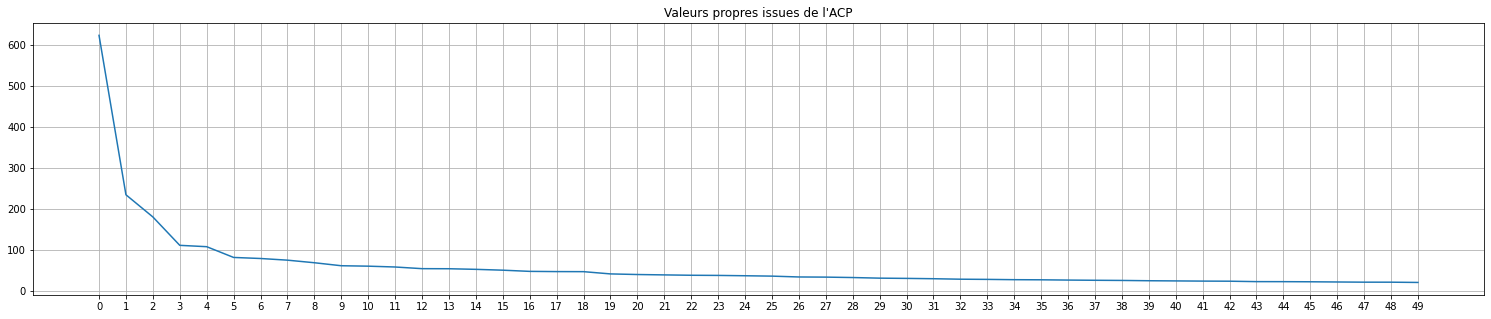

In [0]:
v, d, vt = np.linalg.svd(X_train_cov)
plt.figure(figsize=(26,5))
plt.plot(d[:50])
plt.title("Valeurs propres issues de l'ACP")
plt.xticks(range(50))
plt.grid()
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

In [0]:
%%time
from sklearn.svm import OneClassSVM

# PCA transform
pca1 = PCA(n_components = 10, whiten = True, random_state=RANDOM_STATE)
pca1.fit(xtrain) #[:100,:])
xtrain_fpca = pca1.fit_transform(xtrain[:100,:])

# Fit the low-dimensional method
clf = OneClassSVM(gamma='auto').fit(xtrain_fpca)

# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest)
sscore = -clf.score_samples(xtest_fpca)
print(sscore[:100])

[-18.6169891  -19.14109275 -19.07977099 -19.11170223 -19.12659794
 -19.146696   -19.11212268 -19.12828686 -19.0889957  -18.62376999
 -19.11381711 -19.13264175 -19.12691013 -19.1320697  -19.1254499
 -19.16304671 -19.12473777 -19.13325103 -19.12821744 -19.12646226
 -19.11110762 -19.12655894 -19.14215939 -19.04638846  -1.0183711
 -19.13490527 -19.1385567  -19.1357745  -19.1101715  -19.11000194
 -19.06842187 -19.14168345 -19.12273846 -19.17162253 -19.18020823
 -19.06526254 -19.12241039  -4.26229043 -19.13480564 -18.87414514
 -19.1389055  -19.13360745 -19.13900626 -19.13344769 -19.12955651
 -19.14690095 -18.93218154 -19.12769133 -18.90260707 -19.0563884
 -19.08782173 -19.12731583 -19.13459472 -19.11413703 -18.78116765
 -19.12749904 -19.13530018 -18.81316363 -19.12928601 -19.12892698
 -19.15201383 -19.15834217 -19.14687039 -19.13929388 -19.1434192
 -19.12169134 -18.7139275  -19.13635506 -19.09528744 -19.11311353
  -0.37744948 -19.13037751 -19.04562194 -19.08826799 -18.77669757
 -19.12704518 

TODO: One class SVM

# 5. Submission

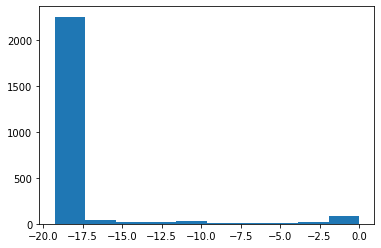

In [0]:
plt.hist(sscore)
plt.show()

In [0]:
# Save the anomaly scores to file
print(sscore.shape)
np.savetxt(ROOT + 'submissions/submission_12.csv', sscore, fmt = '%1.6f', delimiter=',')

(2511,)


* 1: fichier de base (score: 0.706630761244)
* 2: idem mais PCA sur tout le jeu de données (score: 0.714321690336)
* 3: idem mais PCA sur tout le jeu de données aussi pour calculer xtrain_fpca (score: 0.52)
* 4: retour v1 mais avec n_components = 8 pour la pca
* 5: retour v1 mais avec n_components = 10 (je pensais avoir soumis pareil que le 2)
* 6: idem, seed à 261 (0.70)
* 7: idem, seed à 8 (0.7072)
* 8: idem, seed remis à RANDOM_STATE (261) et n_neighbors = 20 pour LFO (0.721539854401)
* 9: xtest au lieu de xtrain, n_components = 5 et n_neighbors = 20 (0.710120879528)
* 10: idem mais n_components = 10 (0.710219758488)
* 11: xconcat (xtrain + xtest) pour le train, n_components = 10 et n_neighbors = 20 (0.721539854401). Même score avec xconcat que xtrain
* 12: OneClassSVM toute simple, gamma= auto (0.693180132745)



Essayer whitten = False, un nombre de p-values différents, xtrain + xtest




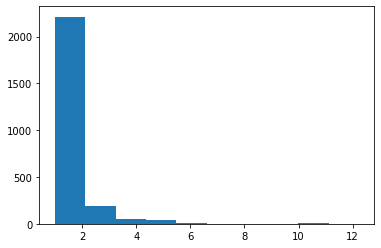

In [0]:
# plot soumission 5
plt.hist(sscore)
plt.show()